# Density at 150 pc (NFW) - pericenter relation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import h5py
import os

from density_profile_fit_utils import fit_nfw_model, fit_core_nfw_model, fit_isothermal_model
from density_profile_utils import calculate_rho_s, calculate_r_s, calculate_M200, calculate_R200, NFW_profile, mass, rho_mean, calculate_error_NFW_rho
from density_pericenter_fit_utils import log_model, run_best_fit_for_sim

from scipy.optimize import curve_fit

plt.style.use("pltstyle.mplstyle")
cmap = matplotlib.cm.RdYlBu

## Observational data

In [2]:
GAIA_PATH = "../data/Gaia/"
Kaplinghat_data = pd.read_csv(GAIA_PATH+"Kaplinghat_2019.csv").to_numpy()
Read_data = pd.read_csv(GAIA_PATH+"Read_2019.csv").to_numpy()

dSph = Kaplinghat_data[:,0]
dSph = dSph[::2]

num_satellites = len(dSph)

In [3]:
# We remove CVnI
num_satellites = 8
dSph = dSph[:-1]

r_p_Isolated = np.zeros((3,num_satellites)) # Reading pericenter assuming isolated MW
r_p_LMC = np.zeros((3,num_satellites))      # Reading pericenter assuming MW perturbed by LMC
rho_150pc_K19 = np.zeros((3,num_satellites)) # Reading Kaplinghat+ 2019 determination under NFW
rho_150pc_R19 = np.zeros((3,num_satellites)) # Reading Read+ 2019 determination under core-NFW
rho_150pc_K19ISO = np.zeros((3,num_satellites)) # Reading Kaplinghat+ 2019 determination under Isothermal


for i, dSphi in enumerate(dSph):
    filename = "Cardona_2023_"+dSphi+".csv"
    data = pd.read_csv(GAIA_PATH + filename).to_numpy()
    r_p_Isolated[0,i] = data[2,0] # Pericenter [kpc]
    r_p_Isolated[1,i] = data[2,1] # (Error) Pericenter [kpc]
    r_p_Isolated[2,i] = data[2,2] # (Error) Pericenter [kpc]
    r_p_LMC[0,i] = data[3,0] # Pericenter [kpc]
    r_p_LMC[1,i] = data[3,1] # Pericenter [kpc]
    r_p_LMC[2,i] = data[3,2] # Pericenter [kpc]
    rho_150pc_K19[0,i] = data[8,0] * 1e7 # Central density [Msun/kpc^3]
    rho_150pc_K19[1,i] = data[8,1] * 1e7 # Central density [Msun/kpc^3]
    rho_150pc_K19[2,i] = data[8,2] * 1e7 # Central density [Msun/kpc^3]
    rho_150pc_K19ISO[0,i] = data[9,0] * 1e7 # Central density [Msun/kpc^3]
    rho_150pc_K19ISO[1,i] = data[9,1] * 1e7 # Central density [Msun/kpc^3]
    rho_150pc_K19ISO[2,i] = data[9,2] * 1e7 # Central density [Msun/kpc^3]
    rho_150pc_R19[0,i] = data[6,0] * 1e7 # Central density [Msun/kpc^3]
    rho_150pc_R19[1,i] = data[6,1] * 1e7 # Central density [Msun/kpc^3]
    rho_150pc_R19[2,i] = data[6,2] * 1e7 # Central density [Msun/kpc^3]

In [4]:
# We do the fitting for observations (NFW)

popt_p_Isolated, pcov = curve_fit(log_model, np.log10(r_p_Isolated[0,:]), np.log10(rho_150pc_K19[0,:]/1e7))
perr_p_Isolated = np.sqrt(np.diag(pcov))
print(popt_p_Isolated, perr_p_Isolated)
popt_p_LMC, pcov = curve_fit(log_model, np.log10(r_p_LMC[0,:]), np.log10(rho_150pc_K19[0,:]/1e7))
perr_p_LMC = np.sqrt(np.diag(pcov))
print(popt_p_LMC, perr_p_LMC)

_q, _m = run_best_fit_for_sim(r_p_LMC[0,:], rho_150pc_K19[0,:])
_q, _m 

[ 2.30112007 -0.66128207] [0.58704218 0.34001611]
[ 1.51969014 -0.19019314] [0.84792992 0.4520326 ]


(1.3884891021102501, -0.1042387389076834)

In [5]:
# We do the fitting for observations (ISO)

popt_p_Isolated_ISO, pcov_ISO = curve_fit(log_model, np.log10(r_p_Isolated[0,:]), np.log10(rho_150pc_K19ISO[0,:]/1e7))
perr_p_Isolated_ISO = np.sqrt(np.diag(pcov_ISO))
print(popt_p_Isolated_ISO, perr_p_Isolated_ISO)
popt_p_LMC_ISO, pcov_ISO = curve_fit(log_model, np.log10(r_p_LMC[0,:]), np.log10(rho_150pc_K19ISO[0,:]/1e7))
perr_p_LMC_ISO = np.sqrt(np.diag(pcov_ISO))
print(popt_p_LMC_ISO, perr_p_LMC_ISO)

# We do the fitting for observations (cNFW)

popt_p_Isolated_cNFW, pcov_cNFW = curve_fit(log_model, np.log10(r_p_Isolated[0,:]), np.log10(rho_150pc_R19[0,:]/1e7))
perr_p_Isolated_cNFW = np.sqrt(np.diag(pcov_cNFW))
print(popt_p_Isolated_cNFW, perr_p_Isolated_cNFW)
popt_p_LMC_cNFW, pcov_cNFW = curve_fit(log_model, np.log10(r_p_LMC[0,:]), np.log10(rho_150pc_R19[0,:]/1e7))
perr_p_LMC_cNFW = np.sqrt(np.diag(pcov_cNFW))
print(popt_p_LMC_cNFW, perr_p_LMC_cNFW)

[ 3.09456537 -1.18637109] [0.94292005 0.54614135]
[ 2.11653988 -0.5678892 ] [1.37961341 0.73547379]
[ 1.87040757 -0.41074682] [0.54078178 0.31322199]
[ 1.35839351 -0.10389114] [0.69953822 0.37292477]


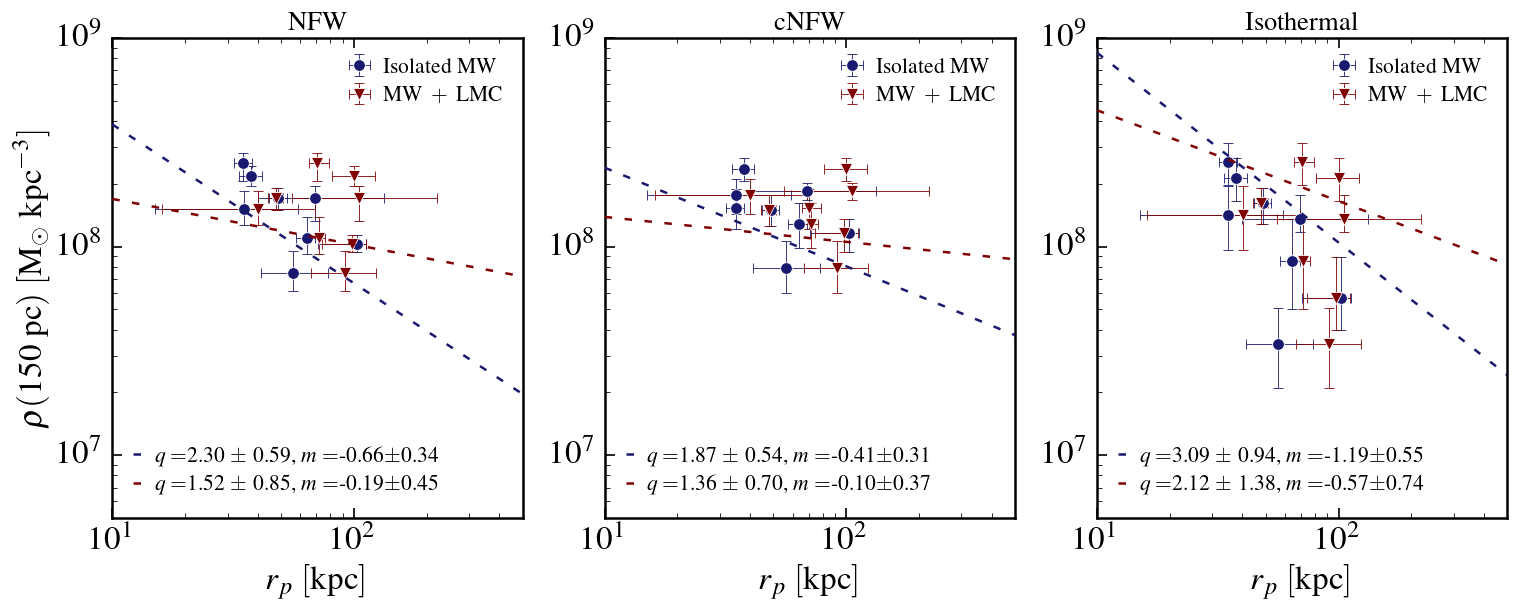

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=120)
               
# NFW
p1 = axs[0].errorbar(r_p_Isolated[0,:], rho_150pc_K19[0,:], xerr=r_p_Isolated[1:,:], yerr=rho_150pc_K19[1:,:],
                    marker='o', markersize=7, markeredgecolor="white", ls='none', lw=0.5, c='midnightblue',
                    label=r'$\mathrm{Isolated\ MW}$')
p2 = axs[0].errorbar(r_p_LMC[0,:], rho_150pc_K19[0,:], xerr=r_p_LMC[1:,:], yerr=rho_150pc_K19[1:,:],
                    marker='v', markersize=7, markeredgecolor="white", ls='none', lw=0.5, c='maroon',
                    label=r'$\mathrm{MW\ +\ LMC}$')
axs[0].legend(loc='upper right', labelspacing=0.4, handlelength=1.8, handletextpad=0.2, frameon=False, fontsize=13, ncol=1, numpoints=1)
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_xlabel(r'$r_{{p}}\ [\mathrm{kpc}]$')
axs[0].set_ylabel(r'$\rho(150\ \mathrm{pc})\ [\mathrm{M}_\odot \ \mathrm{kpc}^{-3}]$')
axs[0].axis([10, 500, 5e6, 1e9])
axs[0].set_title("NFW")


ax2 = axs[0].twinx()
xrange = np.arange(1, 3.2, 0.2)
ax2.plot(10 ** xrange, 1e7 * 10 ** log_model(xrange, *popt_p_Isolated), '--', 
            lw=1.5, color=p1[0].get_color(), 
            label=fr'$q=${format(popt_p_Isolated[0], ".2f")} $\pm$ {format(perr_p_Isolated[0], ".2f")}, $m=${format(popt_p_Isolated[1], ".2f")}$\pm${format(perr_p_Isolated[1], ".2f")}')
ax2.plot(10 ** xrange, 1e7 * 10 ** log_model(xrange, *popt_p_LMC), '--', 
            lw=1.5, color=p2[0].get_color(),   
            label=fr'$q=${format(popt_p_LMC[0], ".2f")} $\pm$ {format(perr_p_LMC[0], ".2f")}, $m=${format(popt_p_LMC[1], ".2f")}$\pm${format(perr_p_LMC[1], ".2f")}')

ax2.legend(loc=[0.03, 0.03], labelspacing=0.4, handlelength=.8, handletextpad=0.2, frameon=False, fontsize=13, ncol=1, numpoints=1)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.axis('off')

# cNFW
p1 = axs[1].errorbar(r_p_Isolated[0,:], rho_150pc_R19[0,:], xerr=r_p_Isolated[1:,:], yerr=rho_150pc_R19[1:,:],
                    marker='o', markersize=7, markeredgecolor="white", ls='none', lw=0.5, c='midnightblue',
                    label=r'$\mathrm{Isolated\ MW}$')
p2 = axs[1].errorbar(r_p_LMC[0,:], rho_150pc_R19[0,:], xerr=r_p_LMC[1:,:], yerr=rho_150pc_R19[1:,:],
                    marker='v', markersize=7, markeredgecolor="white", ls='none', lw=0.5, c='maroon',
                    label=r'$\mathrm{MW\ +\ LMC}$')
axs[1].legend(loc='upper right', labelspacing=0.4, handlelength=1.8, handletextpad=0.2, frameon=False, fontsize=13, ncol=1, numpoints=1)
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel(r'$r_{{p}}\ [\mathrm{kpc}]$')
axs[1].axis([10, 500, 5e6, 1e9])
axs[1].set_title("cNFW")


ax2 = axs[1].twinx()
xrange = np.arange(1, 3.2, 0.2)
ax2.plot(10 ** xrange, 1e7 * 10 ** log_model(xrange, *popt_p_Isolated_cNFW), '--', 
            lw=1.5, color=p1[0].get_color(),
            label=fr'$q=${format(popt_p_Isolated_cNFW[0], ".2f")} $\pm$ {format(perr_p_Isolated_cNFW[0], ".2f")}, $m=${format(popt_p_Isolated_cNFW[1], ".2f")}$\pm${format(perr_p_Isolated_cNFW[1], ".2f")}')
ax2.plot(10 ** xrange, 1e7 * 10 ** log_model(xrange, *popt_p_LMC_cNFW), '--', 
            lw=1.5, color=p2[0].get_color(), 
            label=fr'$q=${format(popt_p_LMC_cNFW[0], ".2f")} $\pm$ {format(perr_p_LMC_cNFW[0], ".2f")}, $m=${format(popt_p_LMC_cNFW[1], ".2f")}$\pm${format(perr_p_LMC_cNFW[1], ".2f")}')

ax2.legend(loc=[0.03, 0.03], labelspacing=0.4, handlelength=.8, handletextpad=0.2, frameon=False, fontsize=13, ncol=1, numpoints=1)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.axis('off')


# ISO
p1 = axs[2].errorbar(r_p_Isolated[0,:], rho_150pc_K19ISO[0,:], xerr=r_p_Isolated[1:,:], yerr=rho_150pc_K19ISO[1:,:],
                    marker='o', markersize=7, markeredgecolor="white", ls='none', lw=0.5, c='midnightblue',
                    label=r'$\mathrm{Isolated\ MW}$')
p2 = axs[2].errorbar(r_p_LMC[0,:], rho_150pc_K19ISO[0,:], xerr=r_p_LMC[1:,:], yerr=rho_150pc_K19ISO[1:,:],
                    marker='v', markersize=7, markeredgecolor="white", ls='none', lw=0.5, c='maroon',
                    label=r'$\mathrm{MW\ +\ LMC}$')
axs[2].legend(loc='upper right', labelspacing=0.4, handlelength=1.8, handletextpad=0.2, frameon=False, fontsize=13, ncol=1, numpoints=1)
axs[2].set_yscale('log')
axs[2].set_xscale('log')
axs[2].set_xlabel(r'$r_{{p}}\ [\mathrm{kpc}]$')
axs[2].axis([10, 500, 5e6, 1e9])
axs[2].set_title("Isothermal")

ax2 = axs[2].twinx()
xrange = np.arange(1, 3.2, 0.2)
ax2.plot(10 ** xrange, 1e7 * 10 ** log_model(xrange, *popt_p_Isolated_ISO), '--', 
            lw=1.5, color=p1[0].get_color(), 
            label=fr'$q=${format(popt_p_Isolated_ISO[0], ".2f")} $\pm$ {format(perr_p_Isolated_ISO[0], ".2f")}, $m=${format(popt_p_Isolated_ISO[1], ".2f")}$\pm${format(perr_p_Isolated_ISO[1], ".2f")}')
ax2.plot(10 ** xrange, 1e7 * 10 ** log_model(xrange, *popt_p_LMC_ISO), '--', 
            lw=1.5, color=p2[0].get_color(),
            label=fr'$q=${format(popt_p_LMC_ISO[0], ".2f")} $\pm$ {format(perr_p_LMC_ISO[0], ".2f")}, $m=${format(popt_p_LMC_ISO[1], ".2f")}$\pm${format(perr_p_LMC_ISO[1], ".2f")}')

ax2.legend(loc=[0.03, 0.03], labelspacing=0.4, handlelength=.8, handletextpad=0.2, frameon=False, fontsize=13, ncol=1, numpoints=1)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.axis('off');

(10.0, 500.0, 5000000.0, 1000000000.0)

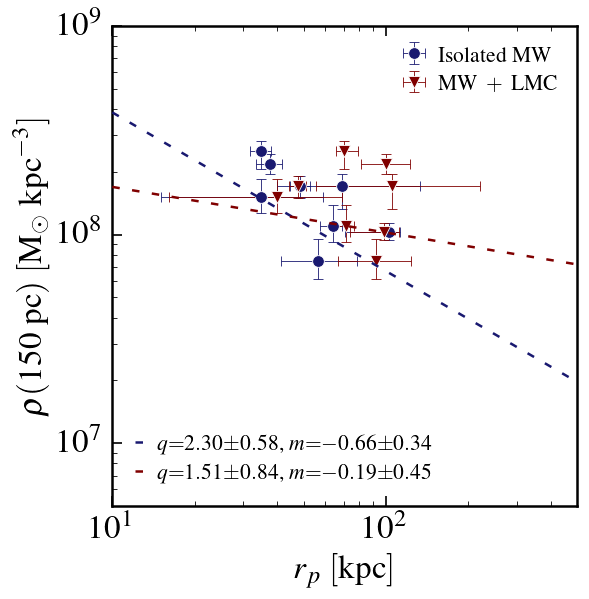

In [7]:
### Use NFW

def plot_obs(axs):

    # Data points                 
    p1 = axs.errorbar(r_p_Isolated[0,:], rho_150pc_K19[0,:], xerr=r_p_Isolated[1:,:], yerr=rho_150pc_K19[1:,:],
                      marker='o', markersize=7, markeredgecolor="white", ls='none', lw=0.5, c='midnightblue',
                      label=r'$\mathrm{Isolated\ MW}$')
    p2 = axs.errorbar(r_p_LMC[0,:], rho_150pc_K19[0,:], xerr=r_p_LMC[1:,:], yerr=rho_150pc_K19[1:,:],
                      marker='v', markersize=7, markeredgecolor="white", ls='none', lw=0.5, c='maroon',
                      label=r'$\mathrm{MW\ +\ LMC}$')
    axs.legend(loc='upper right', labelspacing=0.4, handlelength=1.8, handletextpad=0.2, frameon=False, fontsize=13, ncol=1, numpoints=1)
    axs.set_yscale('log')
    axs.set_xscale('log')

    # Include the fit NFW
    ax2 = axs.twinx()
    xrange = np.arange(1, 3.2, 0.2)
    ax2.plot(10 ** xrange, 1e7 * 10 ** log_model(xrange, *popt_p_Isolated), '--', 
             lw=1.5, color=p1[0].get_color(), label=r'$q{=}2.30{\pm}0.58$, $m{=}{-}0.66{\pm}0.34$')
    ax2.plot(10 ** xrange, 1e7 * 10 ** log_model(xrange, *popt_p_LMC), '--', 
             lw=1.5, color=p2[0].get_color(), label=r'$q{=}1.51{\pm}0.84$, $m{=}{-}0.19{\pm}0.45$')
    
    ax2.legend(loc=[0.03, 0.03], labelspacing=0.4, handlelength=.8, handletextpad=0.2, frameon=False, fontsize=13, ncol=1, numpoints=1)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    ax2.axis('off')
    
    
fig, axs = plt.subplots(1, 1, figsize=(5, 5), dpi=120)
plot_obs(axs)
axs.set_xlabel(r'$r_{{p}}\ [\mathrm{kpc}]$')
axs.set_ylabel(r'$\rho(150\ \mathrm{pc})\ [\mathrm{M}_\odot \ \mathrm{kpc}^{-3}]$')
axs.axis([10, 500, 5e6, 1e9])

## Simulations analysis

In [8]:
DATA_PATH = "../data/TangoSIDM/"

IDs = {
    "SigmaConstant00": "CDM",
    "SigmaConstant01": "SigmaConstant01",
#    "SigmaConstant10": "SigmaConstant10", # I will not include this sim. since its cross section is already ruled out by galaxy clusters
    "SigmaVelDep20Anisotropic": "SigmaVel20",
    "SigmaVelDep60Anisotropic": "SigmaVel60", 
    "SigmaVelDep100Anisotropic": "SigmaVel100",
}

### Fit each MW system in each box

In [9]:
MAX_SATELLITES = None

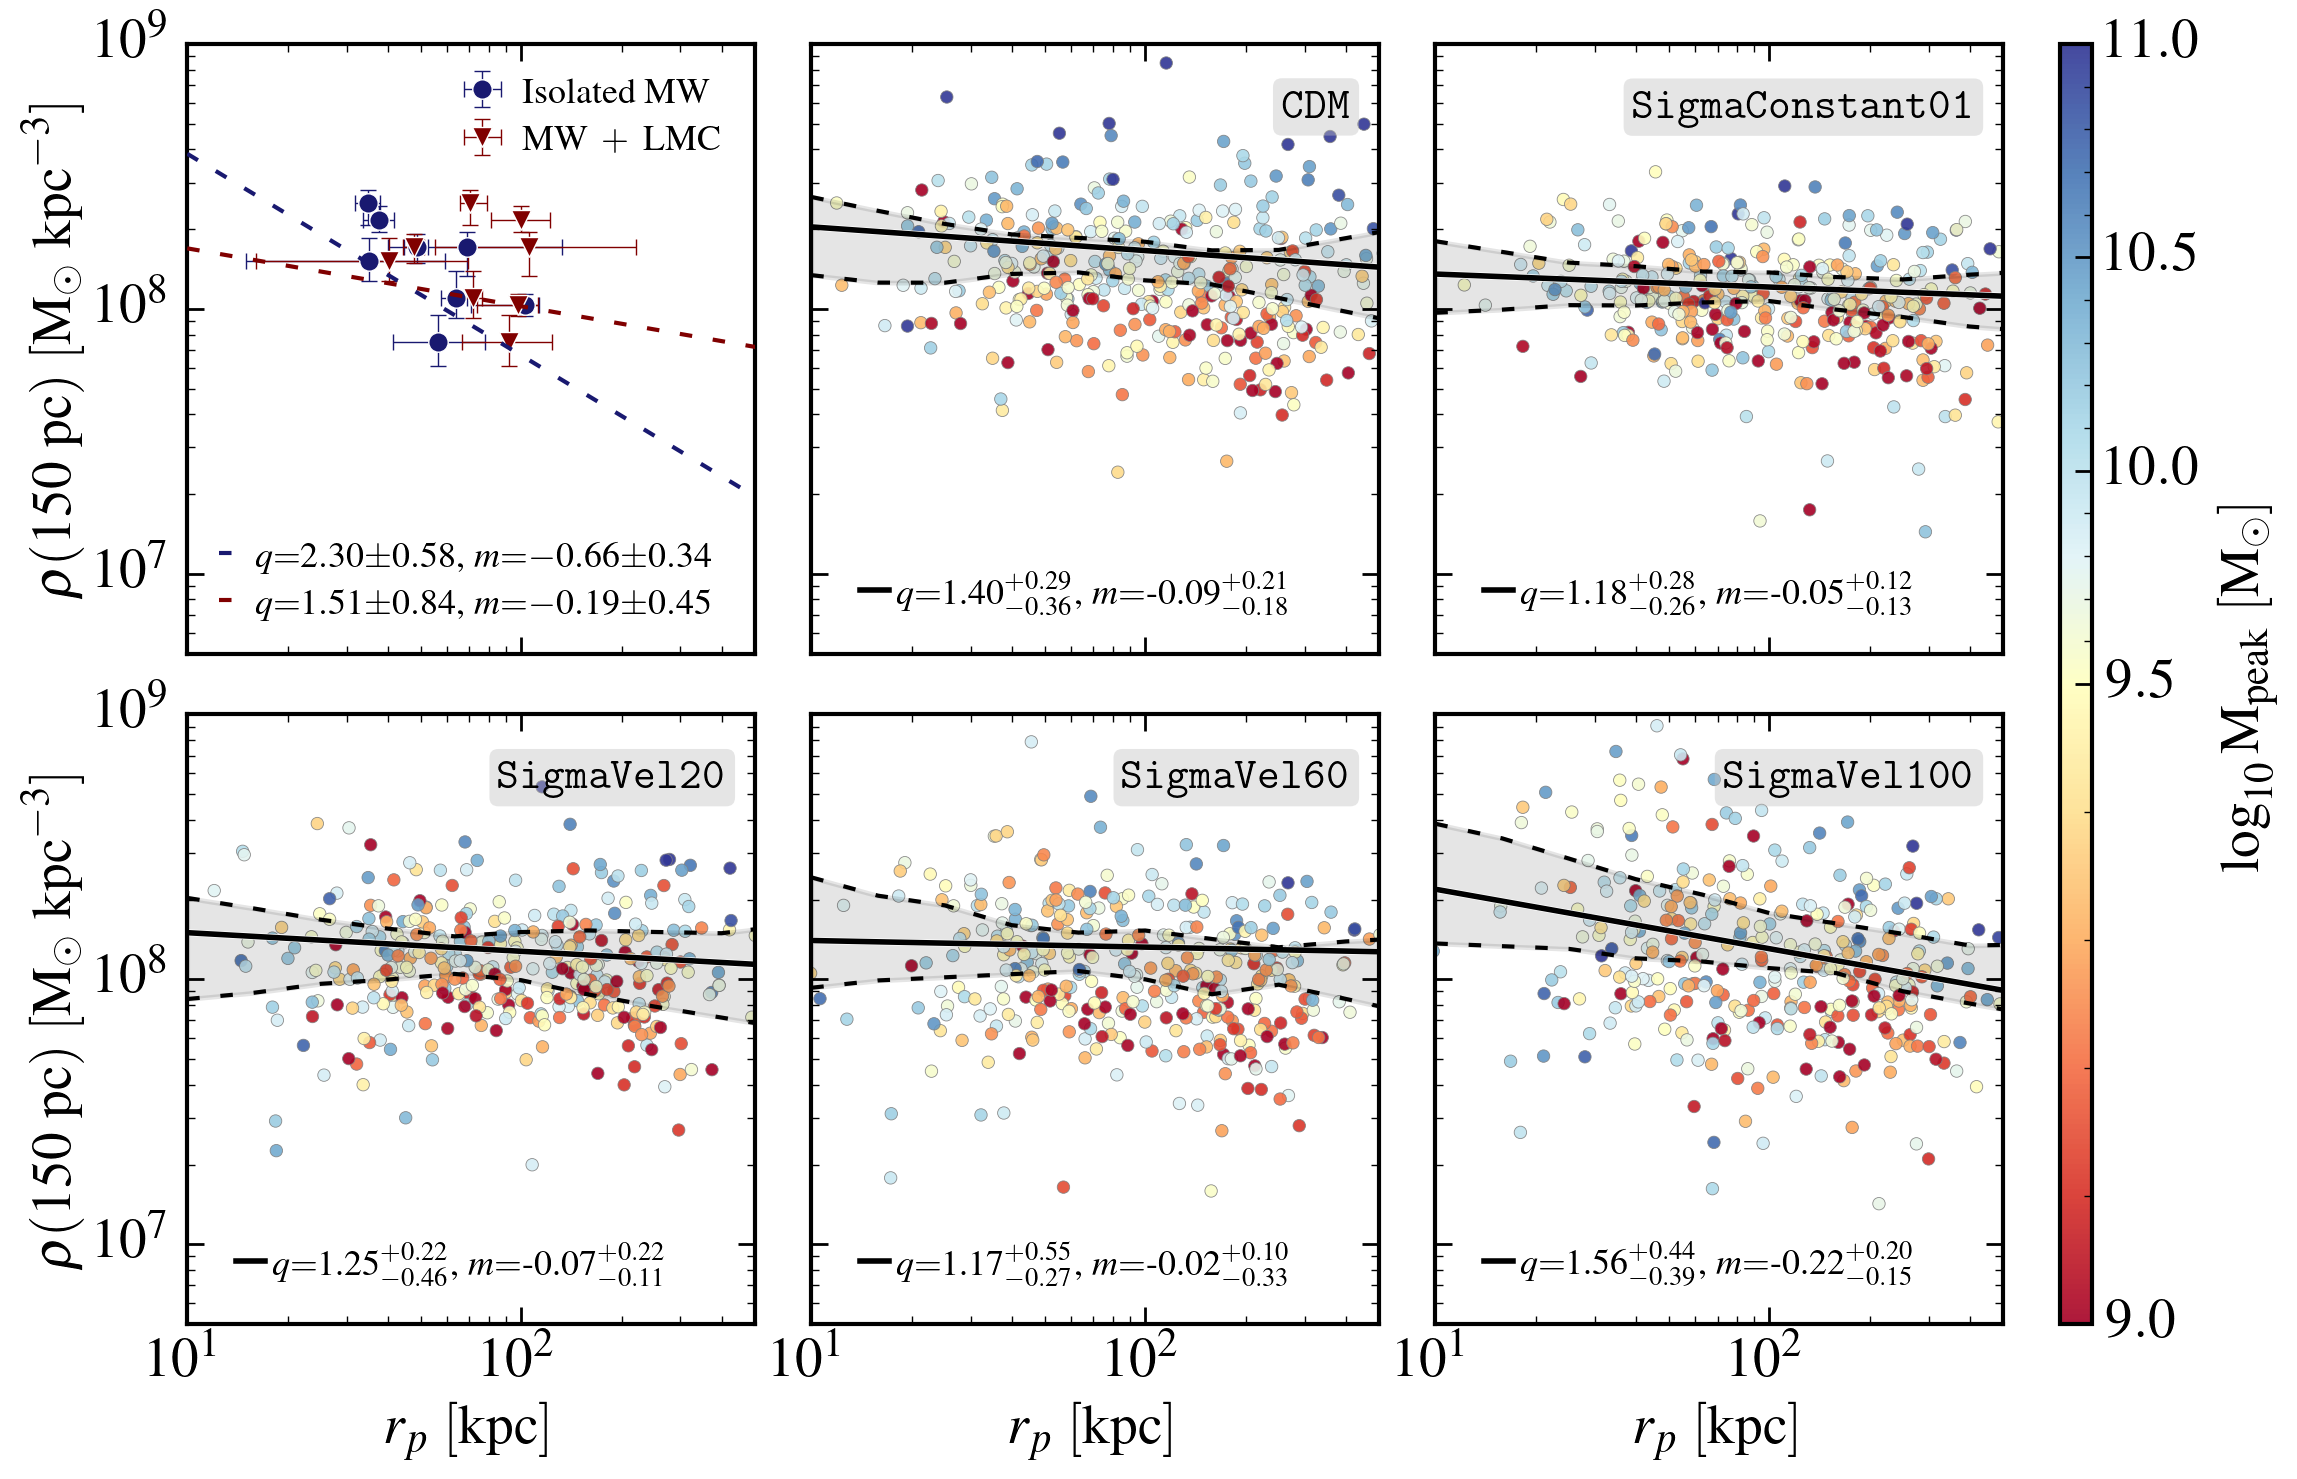

In [10]:
normalize = matplotlib.colors.TwoSlopeNorm(vmin=9, vcenter=9.5, vmax=11)
fig, all_axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(13, 8), dpi=200, facecolor='white')
all_axs = all_axs.flatten() 

for i, (id, id_name) in enumerate(IDs.items()):
    file = h5py.File(DATA_PATH+f"{id}.hdf5", "a")

    axs = all_axs[i+1]
        
    q = []
    m = []
    # Add simulations points
    for idx in file.keys():

        if file[f'{idx}'].attrs.get("main_halo_of") is not None:   
            subhalo_idxs = file[f'{idx}'].attrs.get("main_halo_of")

            rp, rho150, M = [], [], []
            counter = 0
            # Get satellites of MW halo
            for subhalo_idx in subhalo_idxs[:MAX_SATELLITES]:
                if np.log10(file[str(subhalo_idx)]['tree_data']['bound_mass_dm'][0]) > 9: # MINIMUM satellite mass = 10^9
                    data_subhalo = file[f'{subhalo_idx}']

                    # Get pericenter
                    _rp = data_subhalo["tree_data"]["pericenter"][1]
                    _rp = _rp[0] if _rp.shape==(1,) else _rp
                    rp = np.append(rp, _rp)

                    nfw_fit = data_subhalo['halo_data']['nfw_fit']
                    r_s, log10_rho_s, sigma_r_s, sigma_log10_rho_s = nfw_fit
                    rho_s = 10**log10_rho_s
                    _rho_150 = 10**fit_nfw_model(np.array([0.15]), r_s, log10_rho_s)
                    rho150 = np.append(rho150, _rho_150[0])
        
                    # sigma_rho_s = sigma_log10_rho_s * np.log(10) * rho_s
                    # rho = NFW_profile(r_range, rho_s, r_s)
                    # mass_within_r = mass(rho, r_range)
                    # rho_within_r = rho_mean(mass_within_r, r_range)
                    # R200 = calculate_R200(rho_within_r, r_range)
                    # _M = calculate_M200(R200)
                    # M = np.append(M, _M)
                    
                    z_accr_type_idx, accretion = data_subhalo['tree_data']['accretion']
                    mass_peak = data_subhalo['tree_data']['bound_mass_dm'][int(z_accr_type_idx)]                
                    M = np.append(M, mass_peak)
                    
                    counter+=1

            if counter<8: continue # Fit only systems with at least 8 satellites        
            im = axs.scatter(rp, rho150, c=np.log10(M), cmap=cmap, marker='o', edgecolors='grey',
                             lw=0.3, norm=normalize, alpha=0.9)

            # Fit
            _q, _m = run_best_fit_for_sim(rp, rho150)
            q = np.append(q, _q)
            m = np.append(m, _m)
    
    # print(id_name,'q','m')
    xrange = np.arange(1, 3.2, 0.2)
    num_range = len(xrange)
    yrange = np.ones((2,num_range))
    # print(np.median(q), np.median(m))

    errq2 = np.median(q)-np.percentile(q,16)
    errq1 = np.percentile(q,84)-np.median(q)
    errm2 = np.median(m)-np.percentile(m,16)
    errm1 = np.percentile(m,84)-np.median(m)
    label='$q{=}$%.2f'%np.median(q)
    label+='$^{+%.2f}'%errq1+'_{-%.2f}$'%errq2
    label+=', $m{=}$%.2f'%np.median(m)
    label+='$^{+%.2f}'%errm1+'_{-%.2f}$'%errm2

    
    for k in range(num_range):
        yrange[0, k] = np.percentile(1e7 * 10 ** log_model(xrange[k], q, m), 16)
        yrange[1, k] = np.percentile(1e7 * 10 ** log_model(xrange[k], q, m), 84)

    axs.plot(10 ** xrange, 1e7 * 10 ** log_model(xrange, np.median(q), np.median(m)), '-', lw=2.5, color='white')
    axs.plot(10 ** xrange, 1e7 * 10 ** log_model(xrange, np.median(q), np.median(m)), 
             '-', lw=2., color='black',label=label)
    axs.fill_between(10 ** xrange, yrange[0,:], yrange[1,:], color='black', alpha=0.1)
    axs.plot(10 ** xrange, yrange[0,:], '--', color='black')
    axs.plot(10 ** xrange, yrange[1,:], '--', color='black')

    axs.text(0.95, 0.88,  fr'$\texttt{{{id_name}}}$', color='black', transform=axs.transAxes,
                bbox=dict(facecolor='silver', edgecolor='none', alpha=0.4, boxstyle='round, pad=0.2'), zorder=1000, horizontalalignment='right')
        
    axs.axis([10, 500, 5e6, 1e9])
    axs.set_xscale('log')
    axs.set_yscale('log')
    axs.legend(loc=[0.06, 0.04], labelspacing=0.4, handlelength=0.8, handletextpad=0.2, frameon=False, fontsize=13, ncol=1, numpoints=1)
    
    if i >= 3-1:
        axs.set_xlabel(r'$r_{{p}}\ [\mathrm{kpc}]$')
    else:
        axs.get_xaxis().set_ticklabels([])
        
    if i==3-1:
        axs.set_ylabel(r'$\rho(150\ \mathrm{pc})\ [\mathrm{M}_\odot \ \mathrm{kpc}^{-3}]$')
    else:
        axs.get_yaxis().set_ticklabels([])

    ####
    file.close()

####
axs = all_axs[0]
plot_obs(axs)
axs.set_ylabel(r'$\rho(150\ \mathrm{pc})\ [\mathrm{M}_\odot \ \mathrm{kpc}^{-3}]$')
plt.subplots_adjust(hspace=0.1, wspace=0.1, right=.86)

####
# Let's add a colorbar
cbar = plt.colorbar(im, ax=all_axs.ravel().tolist(), label='$\log_{10}\mathrm{M_{peak}}$ $\mathrm{[M_\odot]}$',
                     aspect=40, fraction=0.02, pad=0.03)
cbar.ax.set_yticks([9, 9.5, 10, 10.5, 11]) 

####
plt.savefig(f'figures/Density_pericenter_fit_system_mpeak_best_{MAX_SATELLITES}.png', dpi=300)#, transparent=True)
plt.show()
